# Email Spam Classifier Using Naive Bayes

Naive Bayes is a supervised classification technique based on Baye's Theorem with as assumption of independence amoung predictiors. That is , a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.


It's a popular technique for text categorization, judging documetns as belonging to one category or the other (such as spam or legitimate, sports or politics, etc.) with word frequencies as features.

Goal :  Previously unseen records should be assigned a class as accurately as possible.


We have a buch of emails classifies as 'spam' and a bunch of emails classified as 'ham' (not spam) The emails are first read and stored in a dataframe. They are then parsed using CountVectorizer This information is used to train the model and its prediction is then tested with a sample input Python Libraries used: pandas, numpy, io, os, CountVectorizer and MultinomialNB from sklearn

The Spam classifier classifies the given input as a spam/ham. A sample output is found here.

Some Practical Applications:

. Direct Marketing

. Fraud Detection

. Text Classification

. Spam Filtering

. Categorizing News

. Medical Diagnosis

. Face Recognition

# Context


The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

In [4]:
import pandas as pd

In [8]:
!pip install chardet

                                              0.0/199.4 kB ? eta -:--:--
     ------------------------------------- 199.4/199.4 kB 12.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7272080023536335, 'language': ''}

In [11]:
df = pd.read_csv('spam.csv',encoding= 'Windows-1252')

In [12]:
df.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

In [14]:
df.rename(columns={'v1' : 'Target', 'v2':'Text'}, inplace = True)
df.sample(5)

,Target,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
2823,ham,No need to buy lunch for me.. I eat maggi mee..,NaN,NaN,NaN
4443,ham,COME BACK TO TAMPA FFFFUUUUUUU,NaN,NaN,NaN
4976,ham,A boy was late 2 home. His father: \POWER OF F...,NaN,NaN,NaN
84,ham,Yup next stop.,NaN,NaN,NaN
1865,ham,Call to the number which is available in appoi...,NaN,NaN,NaN


In [15]:
df.shape

(5572, 5)

## We have to perform

1. Data Cleaning
2. EDA 
3. Text Preprocessing
4. Model Building
5. Evauaction
6. Improvement
7. Website
8. Deploy

## 1. Data cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Target      5572 non-null   object
 1   Text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
# dropping las 3 columns

df = df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [20]:
df.sample(5)

,Target,Text
2359,spam,Spook up your mob with a Halloween collection ...
1566,ham,I am late. I will be there at
1984,spam,Urgent! Please call 09061743810 from landline....
928,ham,Oh all have to come ah?
3444,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [22]:
df['Target'] = le.fit_transform(df['Target'])

In [24]:
df.sample(10)

,Target,Text
5163,0,Ok leave no need to ask
659,1,88800 and 89034 are premium phone services cal...
3335,0,Then u go back urself lor...
3300,1,RCT' THNQ Adrian for U text. Rgds Vatian
267,1,Ur ringtone service has changed! 25 Free credi...
3637,1,Customer service announcement. We recently tri...
3116,0,Now am free call me pa.
1293,0,Happy birthday... May all ur dreams come true...
4555,0,Gettin rdy to ship comp
1760,0,Nt yet chikku..simple habba..hw abt u?


In [25]:
# cheking missing values

df.isna().sum()

Target    0
Text      0
dtype: int64

In [26]:
# checking for duplicates

df.duplicated().sum()

403

In [27]:
# removing the duplicated

df = df.drop_duplicates(keep = 'first')

In [28]:
df.duplicated().sum()

0

In [29]:
df.shape

(5169, 2)

# 2. EDA

In [30]:
df.sample(5)

,Target,Text
3064,0,"Sounds good, keep me posted"
938,1,Urgent! call 09061749602 from Landline. Your c...
3423,1,Am new 2 club & dont fink we met yet Will B gr...
3468,0,All day working day:)except saturday and sunday..
1560,0,"Just got some gas money, any chance you and th..."


In [31]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [ ]:
# 0 is ham and 1 is spam

In [32]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1dc5c081d50>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

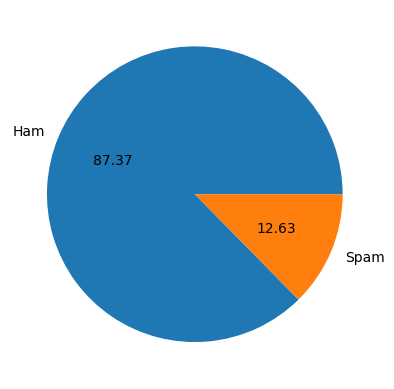

In [33]:
plt.pie(df['Target'].value_counts(),labels= ['Ham','Spam'],autopct='%0.2f')

In [ ]:
# we can see, Data is imbalanced

In [48]:
import nltk

In [50]:
nltk.download("punkt")

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [49]:
df['Num_char'] = df['Text'].apply(len) #num of char in each row
df.sample(5)

,Target,Text,Num_char
4319,0,Hey mr and I are going to the sea view and ha...,112
4216,0,Will be office around 4 pm. Now i am going hos...,52
283,0,Okie...,7
4778,0,O we cant see if we can join denis and mina? O...,74
5166,0,Y she dun believe leh? I tot i told her it's t...,99


In [46]:
# nltk.download("punkt")

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [47]:
df['Num_Words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(df['Target'])))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Admin/nltk_data'
    - 'c:\\Python311\\nltk_data'
    - 'c:\\Python311\\share\\nltk_data'
    - 'c:\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
